In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")

sns.set_theme()

print("Imported")

Imported


In [2]:
data = pd.read_csv("airbnb-listings.csv", sep = ";")
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17619081,https://www.airbnb.com/rooms/17619081,20170615002708,2017-06-15,Nice smallroom i central old Frederiksberg,Min bolig lægger tæt på Bus og Metro. Frederik...,NaN,Min bolig lægger tæt på Bus og Metro. Frederik...,none,NaN,...,10.0,8.0,10.0,NaN,NaN,flexible,2.0,0.66,"55.6759793551,12.5329597787","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,13356620,https://www.airbnb.com/rooms/13356620,20170615002708,2017-06-15,Spacious 95 m2 3 room apt. with great location,Spacious and sunny apt. located close to the b...,The apt. is located on 3rd floor and faces a t...,Spacious and sunny apt. located close to the b...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,1.0,0.41,"55.6759094982,12.5343258647","Host Has Profile Pic,Host Identity Verified,Is..."
2,18993602,https://www.airbnb.com/rooms/18993602,20170615002708,2017-06-15,Bright and lovely 3 room apartment in Copenhagen,Lovely newly renovated 3 room apartment locate...,NaN,Lovely newly renovated 3 room apartment locate...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"55.6914472628,12.5328311114","Host Has Profile Pic,Host Identity Verified"
3,4313438,https://www.airbnb.com/rooms/4313438,20170615002708,2017-06-15,CHAMERENDE FAMILIE LEJLIGHED,Velkommen til vores charmerende lejlighed mid...,NaN,Velkommen til vores charmerende lejlighed mid...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"55.6829245038,12.5365649817","Host Has Profile Pic,Is Location Exact"
4,9029859,https://www.airbnb.com/rooms/9029859,20170615002708,2017-06-15,Room in Frederiksberg - Free wifi,Welcome to CPH ! We are 6 lovely people livin...,NaN,Welcome to CPH ! We are 6 lovely people livin...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,0.15,"55.6839657227,12.5530294872","Host Has Profile Pic,Host Identity Verified,Is..."


In [3]:
data.shape

(494954, 89)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347019 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197643 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

In [5]:
data["Country"].unique()

array(['Denmark', 'United States', 'United Kingdom', 'Belgium',
       'Hong Kong', 'China', 'Spain', 'Ireland', 'Australia', 'Canada',
       'Switzerland', 'France', 'Cuba', 'Germany', 'Netherlands',
       'Greece', 'Italy', 'Vatican City', 'Austria', '0', 'Vanuatu',
       'Mexico', nan, 'Uruguay'], dtype=object)

In [6]:
denmark = data[data["Country"] == "Denmark"].shape
united_states = data[data["Country"] == "United States"].shape
united_kingdom = data[data["Country"] == "United Kingdom"].shape
belgium = data[data["Country"] == "Belgium"].shape
hong_kong = data[data["Country"] == "Hong Kong"].shape
china = data[data["Country"] == "China"].shape
spain = data[data["Country"] == "Spain"].shape
ireland = data[data["Country"] == "Ireland"].shape
australia = data[data["Country"] == "Australia"].shape
canada = data[data["Country"] == "Canada"].shape
switzerland = data[data["Country"] == "Switzerland"].shape
france = data[data["Country"] == "France"].shape
cuba = data[data["Country"] == "Cuba"].shape
germany = data[data["Country"] == "Germany"].shape
netherlands = data[data["Country"] == "Netherlands"].shape
greece = data[data["Country"] == "Greece"].shape
italy = data[data["Country"] == "Italy"].shape
vatican_city = data[data["Country"] == "Vatican City"].shape
austria = data[data["Country"] == "Austria"].shape
vanuatu = data[data["Country"] == "Vanuatu"].shape
mexico = data[data["Country"] == "Mexico"].shape
uruguay = data[data["Country"] == "Uruguay"].shape

In [7]:
countries = list(data["Country"].unique())
Index = []
country_price_null = dict()
for j, i in enumerate(countries):
    if (i != "0") & (i != np.nan):
        Index.append(j)
        target_col = data[data["Country"]==i]["Price"].isnull().sum()
        country_price_null.update({i:target_col})
price_nulls = pd.DataFrame(country_price_null, index = Index).iloc[0,:].to_frame().rename(columns = {0:"nulls"})

total_rows = []
for i in countries:
    if (i != "0") & (i != np.nan):
        target_col = data[data["Country"]==i].shape[0]
        total_rows.append(target_col)
        
price_nulls["total_rows"] = total_rows
price_nulls["missing_percent"] = price_nulls["nulls"]/price_nulls["total_rows"]

In [8]:
price_nulls.sort_values(["total_rows","missing_percent"])

,nulls,total_rows,missing_percent
NaN,0,0,NaN
Cuba,0,1,0.000000
Vanuatu,0,1,0.000000
Uruguay,0,1,0.000000
Vatican City,0,2,0.000000
Mexico,0,2,0.000000
China,1,51,0.019608
Switzerland,11,2381,0.004620
Greece,5,5127,0.000975
Hong Kong,1122,6423,0.174685


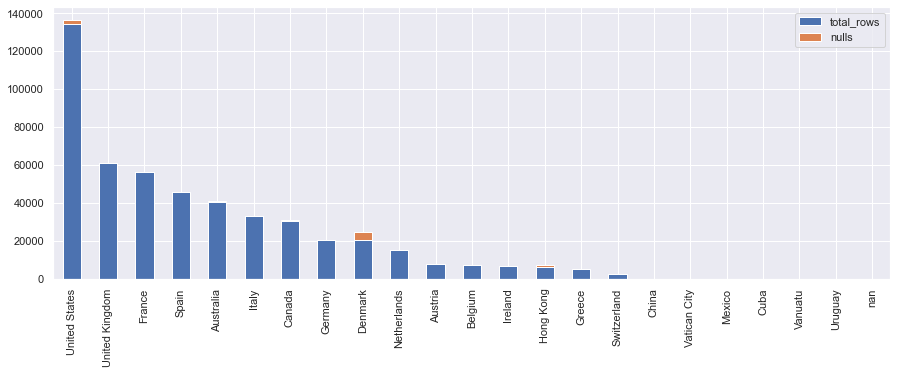

In [9]:
price_nulls[["total_rows","nulls"]].sort_values("total_rows", ascending = False).plot(kind = "bar", stacked = True,figsize = (15,5))
plt.show()

In [12]:
airbnb_us_listings = data[data["Country"] == "United States"].reset_index(drop = True)
airbnb_us_listings

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,16163330,https://www.airbnb.com/rooms/16163330,20170510102046,2017-05-10,Quiet Space to sleep & rest,"Hello. Small bedroom with twin bed, chair, ni...",NaN,"Hello. Small bedroom with twin bed, chair, ni...",none,NaN,...,10.0,9.0,10.0,NaN,"Illinois State, Cook County, IL, CHICAGO",strict,2.0,3.49,"41.9112817535,-87.7024631364","Host Has Profile Pic,Is Location Exact,Require..."
1,6846209,https://www.airbnb.com/rooms/6846209,20170510102046,2017-05-10,Rogue Philanthropy Manor,Our Humboldt Park home features 1.5 bathrooms ...,Old 120-year-old farm house appeal. Not a typ...,Our Humboldt Park home features 1.5 bathrooms ...,none,Humboldt Park is an emerging Chicago neighborh...,...,10.0,9.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,1.0,1.82,"41.906669658,-87.7142914077","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,6448745,https://www.airbnb.com/rooms/6448745,20170510102046,2017-05-10,1 Bedroom in Beautiful Humboldt Park,Come stay in the beautiful Humboldt Park Neigh...,This is a private room with a queen bed locate...,Come stay in the beautiful Humboldt Park Neigh...,none,The park has a lot to offer. -tennis courts / ...,...,10.0,10.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,1.0,2.00,"41.9052639707,-87.7102974903","Host Has Profile Pic,Host Identity Verified,Is..."
3,18139782,https://www.airbnb.com/rooms/18139782,20170510102046,2017-05-10,Private Entry 2 Bdrm near Transit,This sunny 2nd floor 2 bedroom unit is newly r...,"A private, locked remodeled 2 bedroom, 1 bathr...",This sunny 2nd floor 2 bedroom unit is newly r...,none,Humboldt Park is a diverse and vibrant communi...,...,10.0,9.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,2.0,6.00,"41.896351912,-87.7297629805","Host Has Profile Pic,Host Identity Verified,Re..."
4,12467112,https://www.airbnb.com/rooms/12467112,20170510102046,2017-05-10,Beautiful Eco-Friendly Room in Garfield Park,Come stay with us in our beautiful home in Chi...,The house is beautifully refurbished with dark...,Come stay with us in our beautiful home in Chi...,none,"Historically, this neighborhood was a retreat ...",...,10.0,8.0,9.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",strict,3.0,6.58,"41.8871723326,-87.707649842","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134540,15214668,https://www.airbnb.com/rooms/15214668,20170306202425,2017-03-07,Spacious apartment 10 minutes from Zilker Park,"Our place is 10 minutes from Zilker Park/ACL,...",NaN,"Our place is 10 minutes from Zilker Park/ACL,...",none,NaN,...,10.0,10.0,NaN,NaN,NaN,flexible,1.0,0.20,"30.2475296442,-97.845385189","Host Has Profile Pic,Host Identity Verified,Is..."
134541,17345857,https://www.airbnb.com/rooms/17345857,20170306202425,2017-03-07,Barton Creek Retreat,My home is across the street from Barton Creek...,NaN,My home is across the street from Barton Creek...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"30.2920186871,-97.8632310658","Host Has Profile Pic,Is Location Exact,Instant..."
134542,16768276,https://www.airbnb.com/rooms/16768276,20170306202425,2017-03-07,"Cozy, modern room with vintage touches in hip ...",Our MCM inspired home is located in eclectic E...,NaN,Our MCM inspired home is located in eclectic E...,none,My place is close to: Sahara Lounge The Wheel ...,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"30.2810241038,-97.6836083724","Host Has Profile Pic,Host Identity Verified,Is..."
134543,17317756,https://www.airbnb.com/rooms/17317756,20170306202425,2017-03-07,Quirky Eastside Ra

In [13]:
airbnb_us_listings.to_csv("us_airbnb_dataset.csv")